<a href="https://colab.research.google.com/github/ASEBRIYfatima/Virus7/blob/main/Copie_de_TutorialRegression_Multiple_Descente_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


# **Dataset**


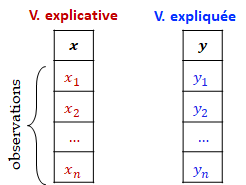

In [ ]:
x,y=make_regression(n_samples=100, n_features=1, noise=10)
print(np.shape(x),np.shape(y))

(100, 1) (100,)


In [ ]:
y=y.reshape(100,1)
print(np.shape(y))

(100, 1)


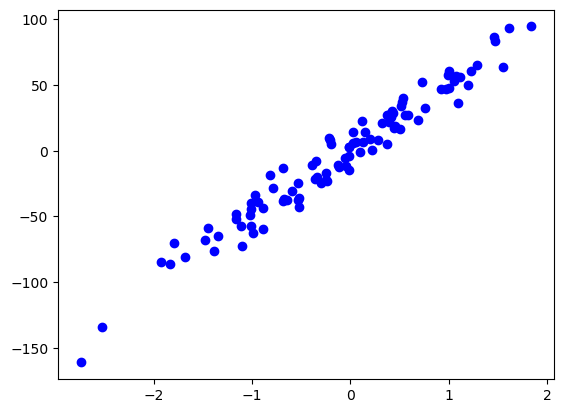

In [ ]:
plt.scatter(x,y,c='b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

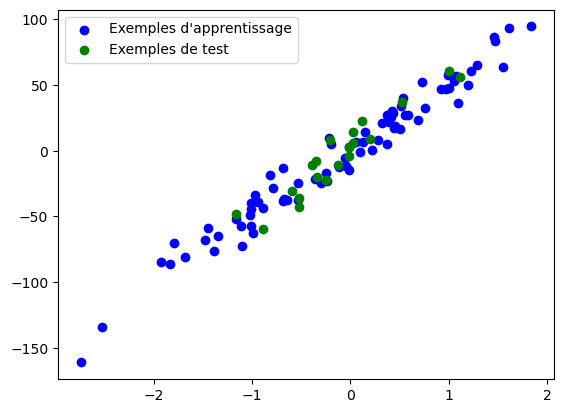

In [ ]:
trainPlot=plt.scatter(x_train,y_train,c='b')
testPlot=plt.scatter(x_test,y_test,c='g')
plt.legend([trainPlot,testPlot],["Exemples d'apprentissage","Exemples de test"])
plt.show()

# **Modèle**

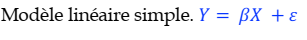

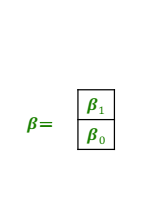

In [ ]:
beta=np.random.randn(2,1)
print(np.shape(beta))

(2, 1)


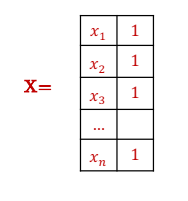

In [ ]:

X_train=np.hstack((x_train,np.ones((np.shape(x_train)[0],1))))
X_test=np.hstack((x_test,np.ones((np.shape(x_test)[0],1))))

print(np.shape(X))

(100, 2)


In [ ]:
X_train

array([[-0.57897199,  1.        ],
       [ 1.33341709,  1.        ],
       [ 0.24649926,  1.        ],
       [ 0.39215056,  1.        ],
       [-2.00496859,  1.        ],
       [-0.0191437 ,  1.        ],
       [ 0.51775631,  1.        ],
       [ 0.72681105,  1.        ],
       [ 0.63268167,  1.        ],
       [-1.36396813,  1.        ],
       [-1.36865365,  1.        ],
       [ 1.57823865,  1.        ],
       [ 1.22688361,  1.        ],
       [-1.35642468,  1.        ],
       [-0.58789417,  1.        ],
       [-1.52155404,  1.        ],
       [-1.43358543,  1.        ],
       [ 0.8435768 ,  1.        ],
       [ 1.08857657,  1.        ],
       [-0.95964627,  1.        ],
       [ 0.34401126,  1.        ],
       [ 0.45197132,  1.        ],
       [ 0.03997054,  1.        ],
       [ 1.66953773,  1.        ],
       [-0.73155653,  1.        ],
       [-0.44631284,  1.        ],
       [-1.40642384,  1.        ],
       [ 0.21750717,  1.        ],
       [ 0.84643073,

In [ ]:
def model(X,beta):
 return X.dot(beta)


In [ ]:
y_pred_train= model(X_train,beta)

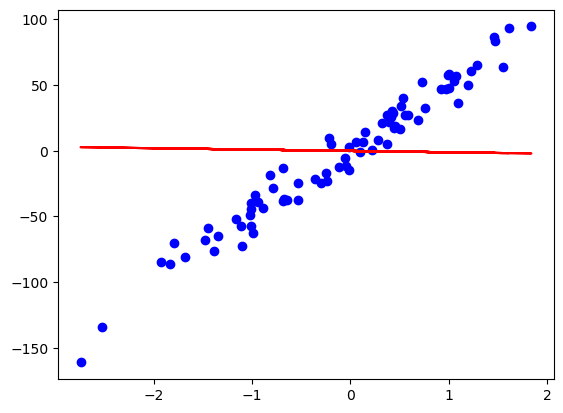

In [ ]:
plt.scatter(x_train,y_train,c='b')
plt.plot(x_train,y_pred_train,c='r')
plt.show()

# **Fonction coût**

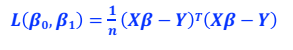

In [ ]:
def fonction_cout(X,beta,y):
  n=len(y)
  term=model(X,beta)-y
  return (1/n)*term.T.dot(term)[0,0]


In [ ]:
fonction_cout(X_train,beta,y_train)

2722.16105937754

# **Algorithme Desente de gradient**


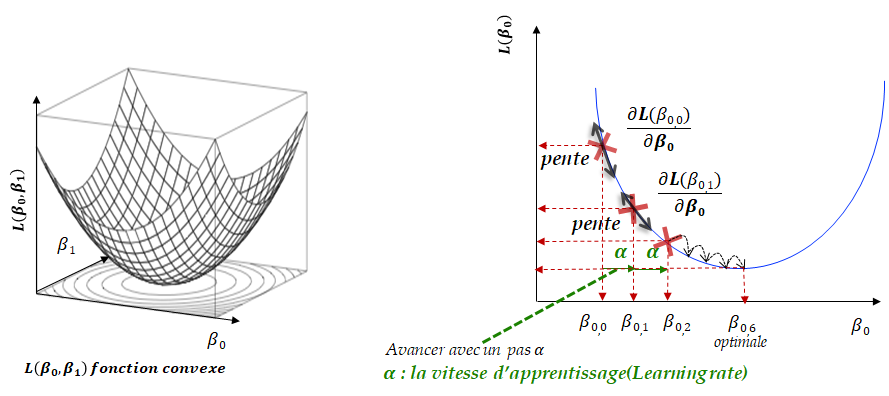




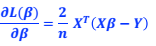

In [ ]:
def grad(X,y,beta):
  n=len(y)
  return (2/n)*X.T.dot(model(X,beta)-y)

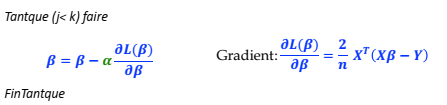

In [ ]:
def gradient_descent(X,y,beta,learning_rate=0.001, n_iteration=1000):
   for i in range(n_iteration):
      beta=beta-learning_rate*grad(X,y,beta)
   return beta


In [ ]:
beta_estimer=gradient_descent(X_train,y_train,beta,learning_rate=0.01, n_iteration=2000)


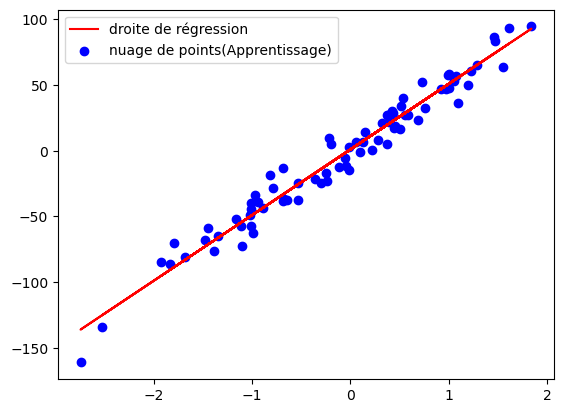

In [ ]:
y_pred_train=model(X_train,beta_estimer)
plt.scatter(x_train,y_train,c='b',label="nuage de points(Apprentissage)")
plt.plot(x_train,y_pred_train, c='r',label="droite de régression" )
plt.legend()
plt.show()


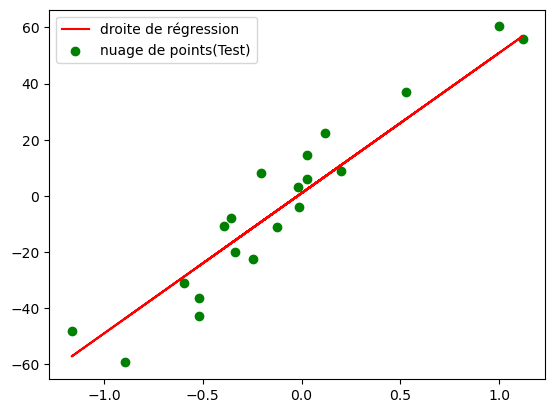

In [ ]:
y_pred_test=model(X_test,beta_estimer)

plt.scatter(x_test,y_test,c='g',label="nuage de points(Test)")
plt.plot(x_test,y_pred_test, c='r',label="droite de régression" )
plt.legend()
plt.show()

# **Courbe d'apprentissage**

In [ ]:
def gradient_descent_with_cost_history(X,y,beta,learning_rate=0.001, n_iteration=1000):
  cost_history=[]
  for i in range(n_iteration):
     beta=beta-learning_rate*grad(X,y,beta)
     cost_history.append(fonction_cout(X,beta,y))
  return beta, cost_history


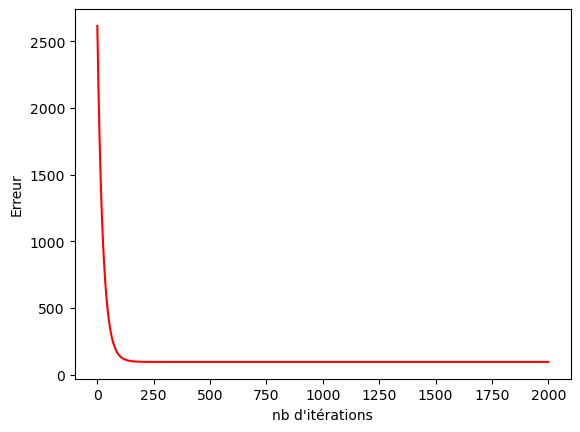

In [ ]:
beta_estimer,cost_history=gradient_descent_with_cost_history(X_train,y_train,beta,learning_rate=0.01, n_iteration=2000)
plt.plot(cost_history,c='r')
plt.xlabel("nb d'itérations")
plt.ylabel("Erreur")
plt.show()

# Evaluation du modèle par l’analyse de la variance(Coefficient de détermination)

In [ ]:
def coef_determination(y,y_pred):
  u=((y-y_pred)**2).sum()
  v=((y-y.mean())**2).sum()
  return 1-u/v

print(coef_determination(y_train,y_pred_train))
print(coef_determination(y_test,y_pred_test))


0.9635404378447257
0.8986817155028408


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))



0.9635404378447257
0.8986817155028408
